In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

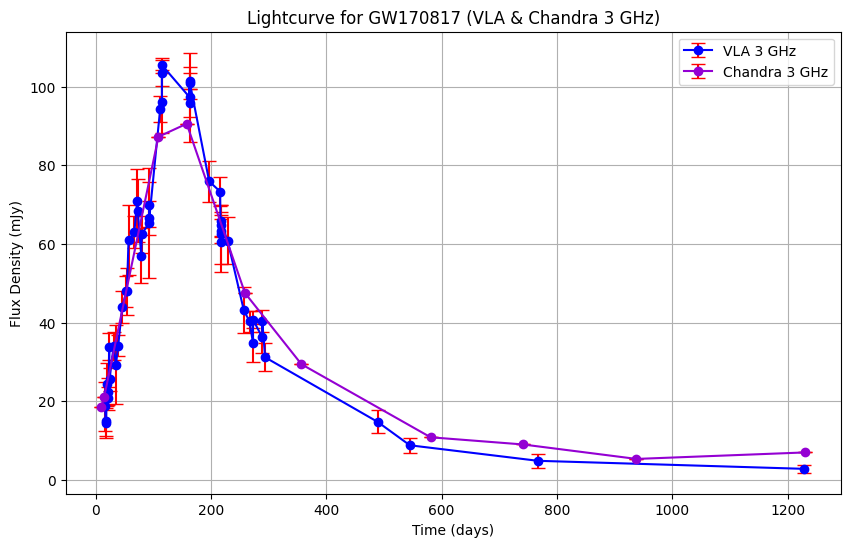

In [9]:
# Load the data from the txt file
file_path = 'Data/gw170817_afterglow_data_full.txt'
data = ascii.read(file_path)

# Convert Data to Pandas DataFrame
data = data.to_pandas()

vla_data = data[data['Telescope'] == 'VLA']
vla_data = vla_data[vla_data['FluxD'].str.contains('<') == False]

vla_data['FluxD'] = pd.to_numeric(vla_data['FluxD'])
vla_data['FluxDErr'] = pd.to_numeric(vla_data['FluxDErr'])
vla_data['Freq'] = pd.to_numeric(vla_data['Freq'])

vla_data['FluxD'] = vla_data['FluxD'] * (vla_data['Freq'] / 3.000000e+09)**0.584
vla_data['Freq'] = 3.000000e+09

plt.figure(figsize=(10, 6))
plt.errorbar(vla_data['T'], vla_data['FluxD'], yerr=vla_data['FluxDErr'], fmt='o', linestyle='-', color='b', ecolor='r', capsize=5, label='VLA 3 GHz')

chandra_data = data[data['Telescope'] == 'Chandra']
chandra_data = chandra_data[chandra_data['FluxD'].str.contains('<') == False]

chandra_data['FluxD'] = pd.to_numeric(chandra_data['FluxD'])
chandra_data['FluxDErr'] = pd.to_numeric(chandra_data['FluxDErr'])
chandra_data['Freq'] = pd.to_numeric(chandra_data['Freq'])

chandra_data['FluxD'] = chandra_data['FluxD'] * (chandra_data['Freq'] / 3.000000e+09)**0.584
chandra_data['Freq'] = 3.000000e+09

plt.errorbar(chandra_data['T'], chandra_data['FluxD'], yerr=chandra_data['FluxDErr'], fmt='o', linestyle='-', color='darkviolet', ecolor='r', capsize=5, label='Chandra 3 GHz')

plt.xlabel('Time (days)')
plt.ylabel('Flux Density (mJy)')
plt.title('Lightcurve for GW170817 (VLA & Chandra 3 GHz)')
plt.legend()
plt.grid(True)

plt.show()
